<center><h1> CUSTOMER SEGMENTATION </h1></center>

<center><h4> Using K-Means Clustering </h4></center>

<b> -- By ANSHU RAJ </b>

### 1. Importing Libraries

In [1]:
import pandas as pd #Pandas (Version : 1.2.4)
import numpy as np #Numpy (Version : 1.20.3)
import matplotlib as mpl #Matplotlib (Version : 3.4.2)
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans #Scikit Learn (Version : 0.24.2)
import seaborn as sns #Seaborn (Version : 0.11.1)
%matplotlib inline

### 2. Importing Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 3. Viewing and Describing the Data

Now, we view the head and tail of the data

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Checking the dimensions of the dataframe

In [5]:
df.shape

(200, 5)

Columns in the dataframe

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 4. Futher cleaning of data

Checking the dataset for missing values.

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dropping the 'CustomerID' column from the dataframe.

In [10]:
df = df.drop('CustomerID',axis = 1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Renaming the 'Annual Income (k$)' and 'Spending Score(1-100)' column name.

In [11]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'})
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 5. Data Visualization

In [12]:
corr = df.corr()

In [13]:
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


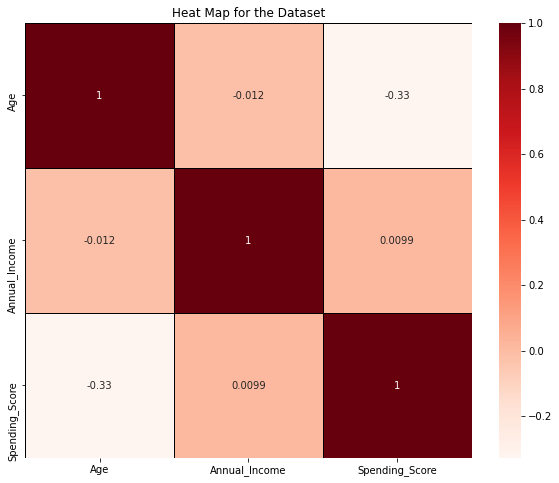

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heat Map for the Dataset')
plt.show()

#### Visulaizing Gender Distribution

Plotting gender distribution ratio on a pie chart

In [15]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### Density estimation using distplot

c:\users\anshu raj\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\anshu raj\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\anshu raj\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

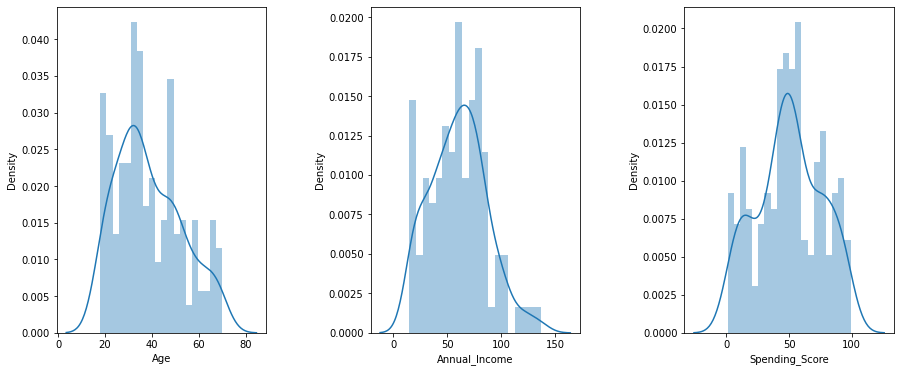

In [16]:
plt.figure(1, figsize = (15,6))
feature_list = ['Age','Annual_Income','Spending_Score']
pos = 1
for i in feature_list :
    plt.subplot(1,3,pos)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[i], bins = 20, kde = True)
    pos = pos + 1
plt.show()

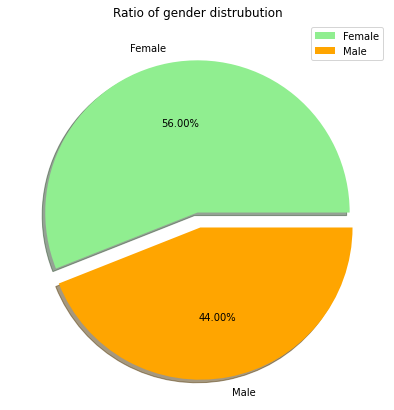

In [17]:
labels = ['Female','Male']
size = [112,88]
colours = ['lightgreen','orange']
explode = [0,0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colours, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Ratio of gender distrubution')
plt.axis('off')
plt.legend()
plt.show()

#### Visulaizing age data

#### Annual Income vs Age

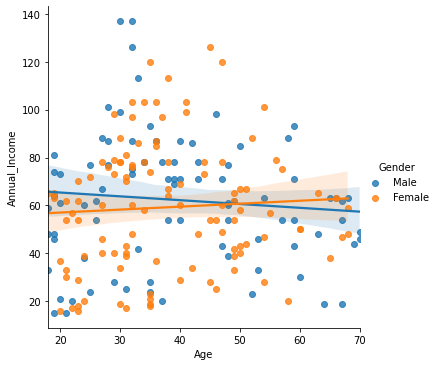

In [18]:
sns.lmplot(x = 'Age', y = 'Annual_Income', data = df, hue = 'Gender')

#### Spending Score vs Annual Income

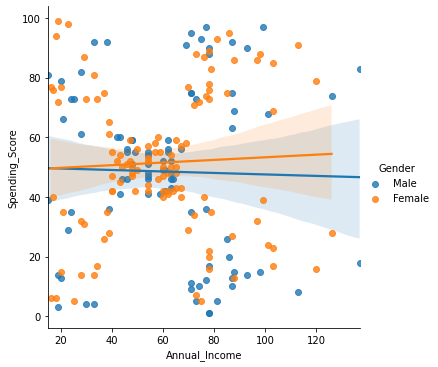

In [19]:
sns.lmplot(x = 'Annual_Income', y = 'Spending_Score', data = df, hue = 'Gender')

#### Age vs Spending Score

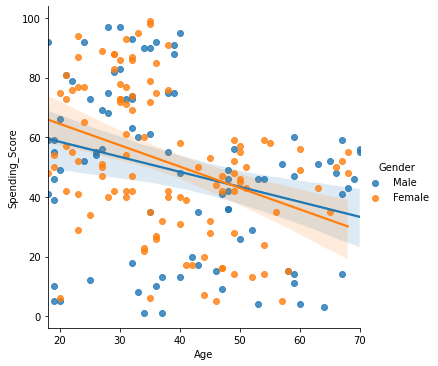

In [20]:
sns.lmplot(x = 'Age', y = 'Spending_Score', data = df, hue = 'Gender')

### 6. Clustering

#### Determining the number of clusters (Elbow Method)

In the process of clustering we will not be considering the gender factor anymore. The first main reason of why we do take this approach is because the difference between male and female in this data is not particularly high and making a gender differentiaton won't provide any further information. 

In [21]:
# Creating Values for the elbow
X = df.loc[:,['Age','Annual_Income','Spending_Score']]
wcss = []
for k in range(1,11):
    K_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    K_means.fit(X)
    wcss.append(K_means.inertia_)

Text(0, 0.5, 'WCSS')

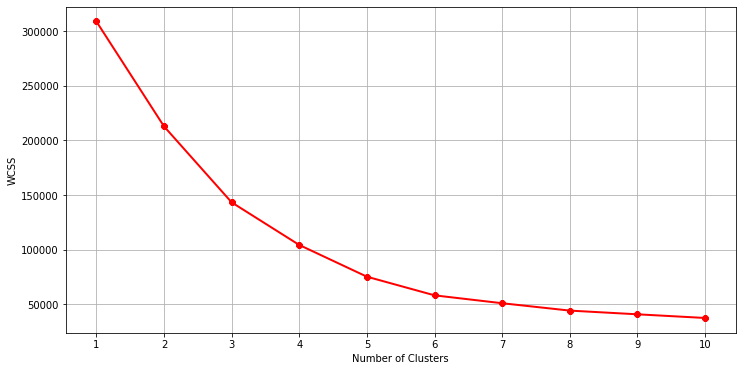

In [22]:
# Plotting the elbow
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')

we are selecting 5 as the number of clusters to divide our data in.

#### Developing Model 

In [23]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
clusters = km.fit_predict(X)
df['Labels'] = clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,Labels
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


#### Visualizing the clusters

<ipython-input-24-4781fc762c18>:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


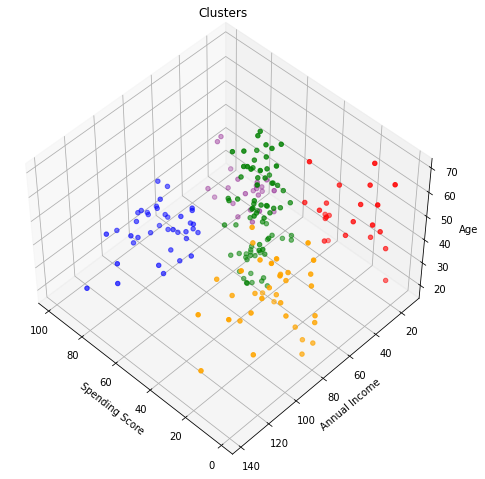

In [24]:
color = []
for i in clusters :
    if (i==0):
        color.append('red')
    if (i==1):
        color.append('blue')
    if (i==2):
        color.append('green')
    if (i==3):
        color.append('orange')
    if (i==4):
        color.append('purple')
        
        
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plt.title('Clusters')
ax.set_xlabel('Spending Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')

ax.scatter(X['Spending_Score'], X['Annual_Income'], X['Age'], c= color)